# Init

In [ ]:
!pip install onnxruntime onnx skl2onnx

In [ ]:
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random
from itertools import product
from google.colab import drive


import pandas as pd
from scipy import stats

from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_selection import VarianceThreshold
from scipy.stats import ttest_rel


from skl2onnx.common.data_types import FloatTensorType
from skl2onnx import to_onnx
from skl2onnx import convert_sklearn
import onnxruntime as rt
import onnx

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
random.seed = 42
np.random.seed = random.seed

In [ ]:
age_ft_path = '/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/20240410_kgar_archage.csv'
test_data = pd.read_csv('/content/drive/MyDrive/tnv-final-project/test.csv')

In [ ]:
model_1_external = rt.InferenceSession('/content/drive/MyDrive/TnV-2nd_proj/model/model_1_external.onnx')
model_2_external = rt.InferenceSession('/content/drive/MyDrive/TnV-2nd_proj/model/model_2_external.onnx')
model_gbc = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/gboost.onnx')
model_1_internal = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/model1.onnx')
model_2_internal = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/model2.onnx')

In [ ]:
age_ft_df = pd.read_csv(age_ft_path)

In [ ]:
age_ft_df.head()

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn,data_type
0,2,1,0,0,6653,1,0,0,1,0,...,1,0,1,0,0,0,0,0,0,synth
1,3,2,1,1,2244,1,0,0,0,0,...,1,0,1,1,1,0,1,0,0,synth
2,3,2,0,1,4692,1,0,0,1,0,...,2,0,1,0,1,0,1,0,0,synth
3,6,4,1,1,2564,1,0,0,0,0,...,1,0,1,0,1,0,1,0,0,synth
4,4,1,0,0,6050,1,0,0,0,0,...,3,0,1,0,0,0,0,0,0,synth


In [ ]:
y_test_data_from_training = test_data['checked']
X_test_data_from_training = test_data.copy(deep=True).astype(np.float32)
X_test_data_from_training.drop('checked', axis=1, inplace=True)
X_test_data_from_training

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,5.0,4.0,1.0,1.0,2876.0,0.0,0.0,0.0,1.0,0.0,...,5368.0,2.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
1,3.0,2.0,1.0,1.0,3504.0,1.0,0.0,0.0,0.0,0.0,...,6183.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
2,3.0,1.0,0.0,0.0,5918.0,1.0,0.0,0.0,0.0,0.0,...,1617.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.0,2.0,1.0,1.0,11532.0,1.0,0.0,0.0,1.0,0.0,...,1427.0,3.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0
4,2.0,1.0,0.0,0.0,23426.0,1.0,0.0,0.0,1.0,0.0,...,-1308.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3157,3.0,2.0,0.0,0.0,5518.0,1.0,0.0,0.0,1.0,0.0,...,-2897.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3158,1.0,2.0,1.0,0.0,11521.0,1.0,1.0,0.0,0.0,0.0,...,-389.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3159,4.0,3.0,1.0,0.0,3424.0,1.0,0.0,0.0,1.0,0.0,...,1486.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3160,2.0,2.0,0.0,1.0,16151.0,1.0,0.0,0.0,0.0,0.0,...,2355.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
y_age_ft = age_ft_df['data_type']
X_age_ft = age_ft_df.drop('data_type', axis=1, inplace=True)
X_age_ft = age_ft_df.copy(deep=True).astype(np.float32)
X_age_ft

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,2.0,1.0,0.0,0.0,6653.0,1.0,0.0,0.0,1.0,0.0,...,-308.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3.0,2.0,1.0,1.0,2244.0,1.0,0.0,0.0,0.0,0.0,...,5286.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0
2,3.0,2.0,0.0,1.0,4692.0,1.0,0.0,0.0,1.0,0.0,...,8354.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
3,6.0,4.0,1.0,1.0,2564.0,1.0,0.0,0.0,0.0,0.0,...,4317.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
4,4.0,1.0,0.0,0.0,6050.0,1.0,0.0,0.0,0.0,0.0,...,-398.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50657,3.0,3.0,1.0,1.0,7257.0,1.0,0.0,0.0,1.0,0.0,...,194.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50658,5.0,4.0,1.0,1.0,5618.0,1.0,0.0,0.0,1.0,0.0,...,-4052.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50659,4.0,2.0,0.0,1.0,8409.0,1.0,0.0,0.0,0.0,0.0,...,-1858.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
50660,2.0,1.0,0.0,0.0,12242.0,1.0,0.0,0.0,0.0,0.0,...,-2023.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
def convert_dataframe_schema(df, drop=None):
    inputs = []
    for k, v in zip(df.columns, df.dtypes):
        if drop is not None and k in drop:
            continue

        t = FloatTensorType([None, 1])

        inputs.append((k, t))
    return inputs


initial_inputs = convert_dataframe_schema(X_age_ft)
inputs = {c: X_age_ft[c].values for c in X_age_ft.columns}

for (c, _) in initial_inputs:
    inputs[c] = inputs[c].astype(np.float32)
for k in inputs:
    inputs[k] = inputs[k].reshape((inputs[k].shape[0], 1))

In [ ]:
y_pred_m1_external =  model_1_external.run(None, inputs)
y_pred_m2_external =  model_2_external.run(None, inputs)

In [ ]:
predicted_m1_external = [label for label in y_pred_m1_external[0]]
predicted_m2_external = [label for label in y_pred_m2_external[0]]

In [ ]:
y_pred_m1_internal =  model_1_internal.run(None, {'X': X_age_ft.values})
y_pred_m2_internal =  model_2_internal.run(None, {'X': X_age_ft.values})

In [ ]:
predicted_m1_internal = [label for label in y_pred_m1_internal[0]]
predicted_m2_internal = [label for label in y_pred_m2_internal[0]]

# Old vs Young

In [ ]:
old_df = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/20240410_kgar_archold.csv')
old_df = old_df.drop('data_type', axis=1)
young_df = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/20240410_kgar_archyoung.csv')
young_df = young_df.drop('data_type', axis=1)
age_df = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/20240417_kgar_archage.csv')
age_df = age_df.drop('data_type', axis=1)

In [ ]:
old_df.head()

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,4,3,1,1,3706,1,0,0,0,0,...,3932,1,0,1,0,0,0,1,0,0
1,2,2,1,1,21362,1,0,0,0,0,...,5124,2,0,1,0,1,0,1,0,0
2,3,1,1,1,10848,1,0,0,1,0,...,1490,2,0,1,0,1,0,1,0,0
3,4,3,0,2,10761,1,0,0,1,0,...,3615,3,0,1,0,1,0,1,0,0
4,2,2,1,0,5456,1,0,0,1,0,...,891,2,0,1,0,1,1,1,0,0


In [ ]:
young_df.head()

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,6,5,2,1,48,0,0,0,1,0,...,-3171,2,0,1,0,1,1,1,0,0
1,4,3,1,0,185,1,0,0,1,0,...,6997,3,0,1,0,1,0,0,0,0
2,2,2,0,0,14242,1,0,0,0,0,...,2572,2,0,1,0,1,0,0,0,0
3,3,3,0,1,5610,1,0,0,0,0,...,2033,2,0,1,0,1,0,0,0,0
4,7,4,1,1,378,1,0,0,0,0,...,75,2,0,1,0,1,0,0,0,0


In [ ]:
age_df.head()

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,2,1,0,0,6653,1,0,0,1,0,...,-308,1,0,1,0,0,0,0,0,0
1,3,2,1,1,2244,1,0,0,0,0,...,5286,1,0,1,1,1,0,1,0,0
2,3,2,0,1,4692,1,0,0,1,0,...,8354,2,0,1,0,1,0,1,0,0
3,6,4,1,1,2564,1,0,0,0,0,...,4317,1,0,1,0,1,0,1,0,0
4,4,1,0,0,6050,1,0,0,0,0,...,-398,3,0,1,0,0,0,0,0,0


In [ ]:
def convert_dataframe_schema(df, drop=None):
    inputs = []
    for k, v in zip(df.columns, df.dtypes):
        if drop is not None and k in drop:
            continue

        t = FloatTensorType([None, 1])

        inputs.append((k, t))
    return inputs


initial_inputs = convert_dataframe_schema(X_age_ft)
inputs_old = {c: old_df[c].values for c in old_df.columns}
inputs_young = {c: young_df[c].values for c in young_df.columns}

for (c, _) in initial_inputs:
    inputs_old[c] = inputs_old[c].astype(np.float32)
    inputs_young[c] = inputs_young[c].astype(np.float32)
for k in inputs:
    inputs_old[k] = inputs_old[k].reshape((inputs_old[k].shape[0], 1))
    inputs_young[k] = inputs_young[k].reshape((inputs_young[k].shape[0], 1))

In [ ]:
old_preds_m1_external =  model_1_external.run(None, inputs_old)
old_preds_m2_external =  model_2_external.run(None, inputs_old)
old_predicted_m1_external = [label for label in old_preds_m1_external[0]]
old_predicted_m2_external = [label for label in old_preds_m2_external[0]]

old_preds_m1_internal =  model_1_internal.run(None, {'X': old_df.values.astype(np.float32)})
old_preds_m2_internal =  model_2_internal.run(None, {'X': old_df.values.astype(np.float32)})
old_predicted_m1_internal = [label for label in old_preds_m1_internal[0]]
old_predicted_m2_internal = [label for label in old_preds_m2_internal[0]]

In [ ]:
old_df['m1_ex'] = old_predicted_m1_external
old_df['m2_ex'] = old_predicted_m2_external
old_df['m1_in'] = old_predicted_m1_internal
old_df['m2_in'] = old_predicted_m2_internal

In [ ]:
young_preds_m1_external =  model_1_external.run(None, inputs_young)
young_preds_m2_external =  model_2_external.run(None, inputs_young)
young_predicted_m1_external = [label for label in young_preds_m1_external[0]]
young_predicted_m2_external = [label for label in young_preds_m2_external[0]]

young_preds_m1_internal =  model_1_internal.run(None, {'X': young_df.values.astype(np.float32)})
young_preds_m2_internal =  model_2_internal.run(None, {'X': young_df.values.astype(np.float32)})
young_predicted_m1_internal = [label for label in young_preds_m1_internal[0]]
young_predicted_m2_internal = [label for label in young_preds_m2_internal[0]]

In [ ]:
young_df['m1_ex'] = young_predicted_m1_external
young_df['m2_ex'] = young_predicted_m2_external
young_df['m1_in'] = young_predicted_m1_internal
young_df['m2_in'] = young_predicted_m2_internal

In [ ]:
old_df['persoon_leeftijd_bij_onderzoek'].unique()

array([65, 75])

In [ ]:
young_df['persoon_leeftijd_bij_onderzoek'].unique()

array([25, 18])

m1_ex predicted m1_ex
0    22683
1     2377
Name: count, dtype: int64
m2_ex predicted m2_ex
0    21680
1     3380
Name: count, dtype: int64
m1_in predicted m1_in
0    24780
1      280
Name: count, dtype: int64
m2_in predicted m2_in
0    22867
1     2193
Name: count, dtype: int64


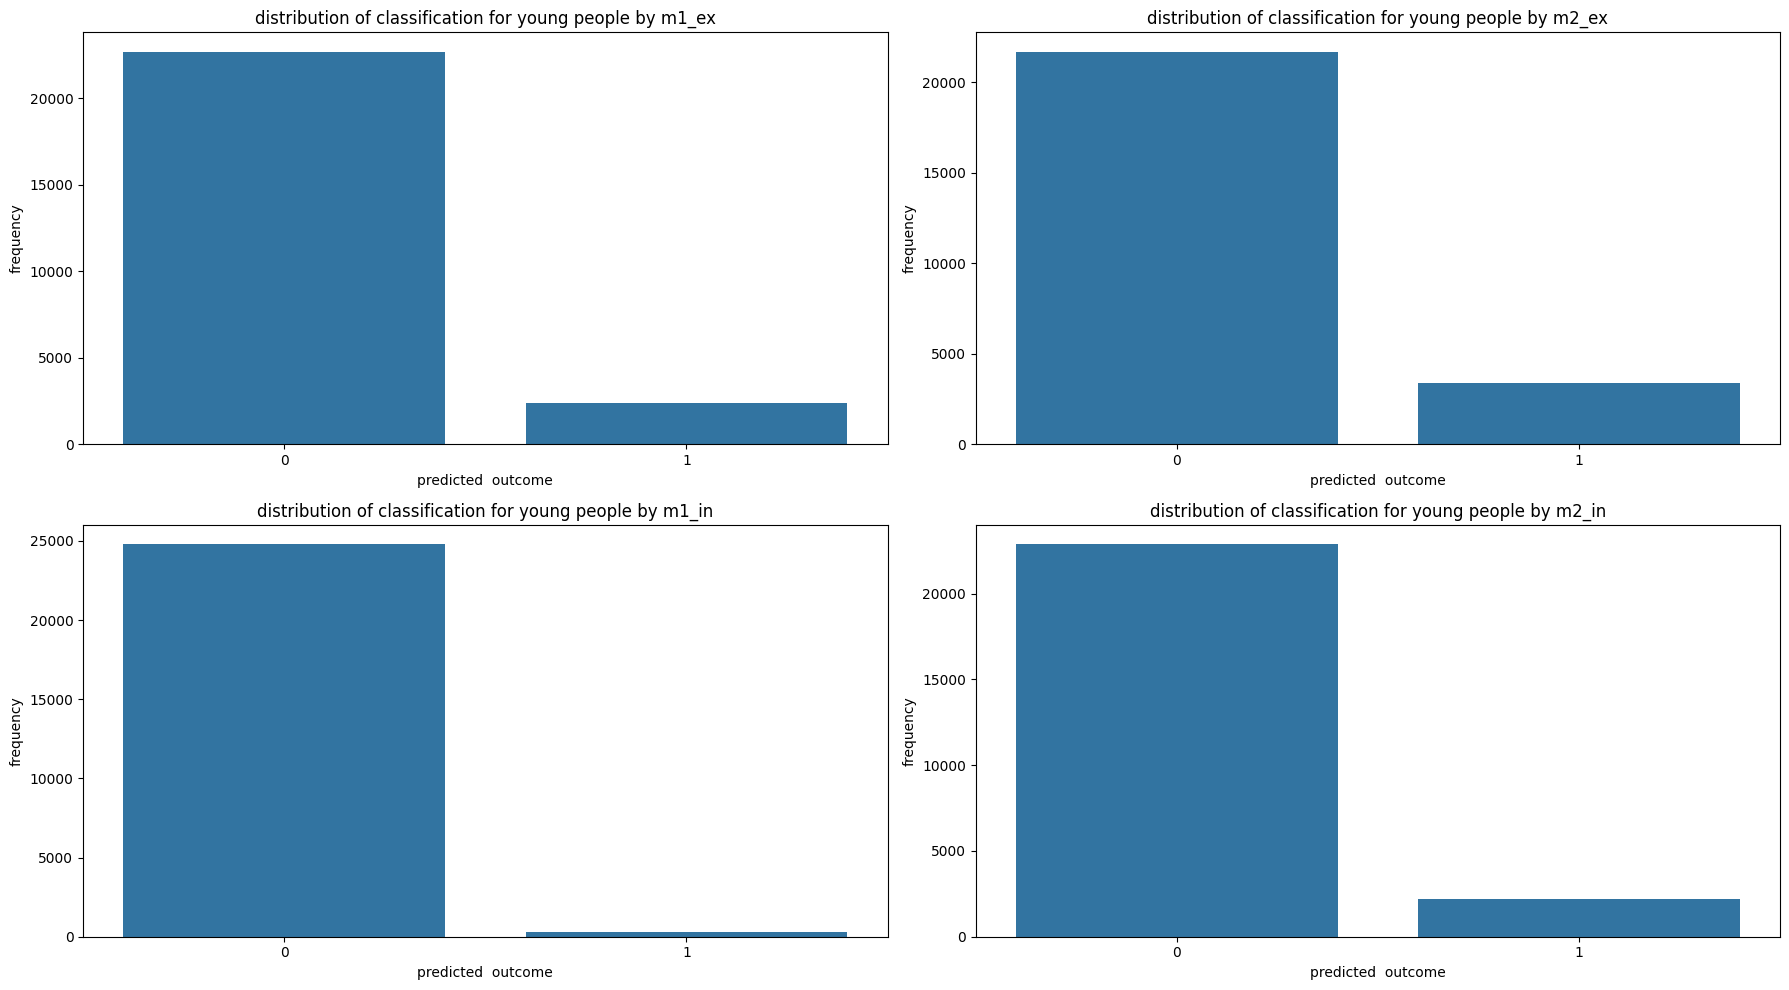

In [ ]:
model_names = ['m1_ex', 'm2_ex', 'm1_in', 'm2_in']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=young_df[model_name])
  print(f'{model_name} predicted {young_df[model_name].value_counts()}')
  plt.title(f'distribution of classification for young people by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    22984
1     2290
Name: count, dtype: int64
m2_ex predicted m2_ex
0    13530
1    11744
Name: count, dtype: int64
m1_in predicted m1_in
0    25274
Name: count, dtype: int64
m2_in predicted m2_in
0    20062
1     5212
Name: count, dtype: int64


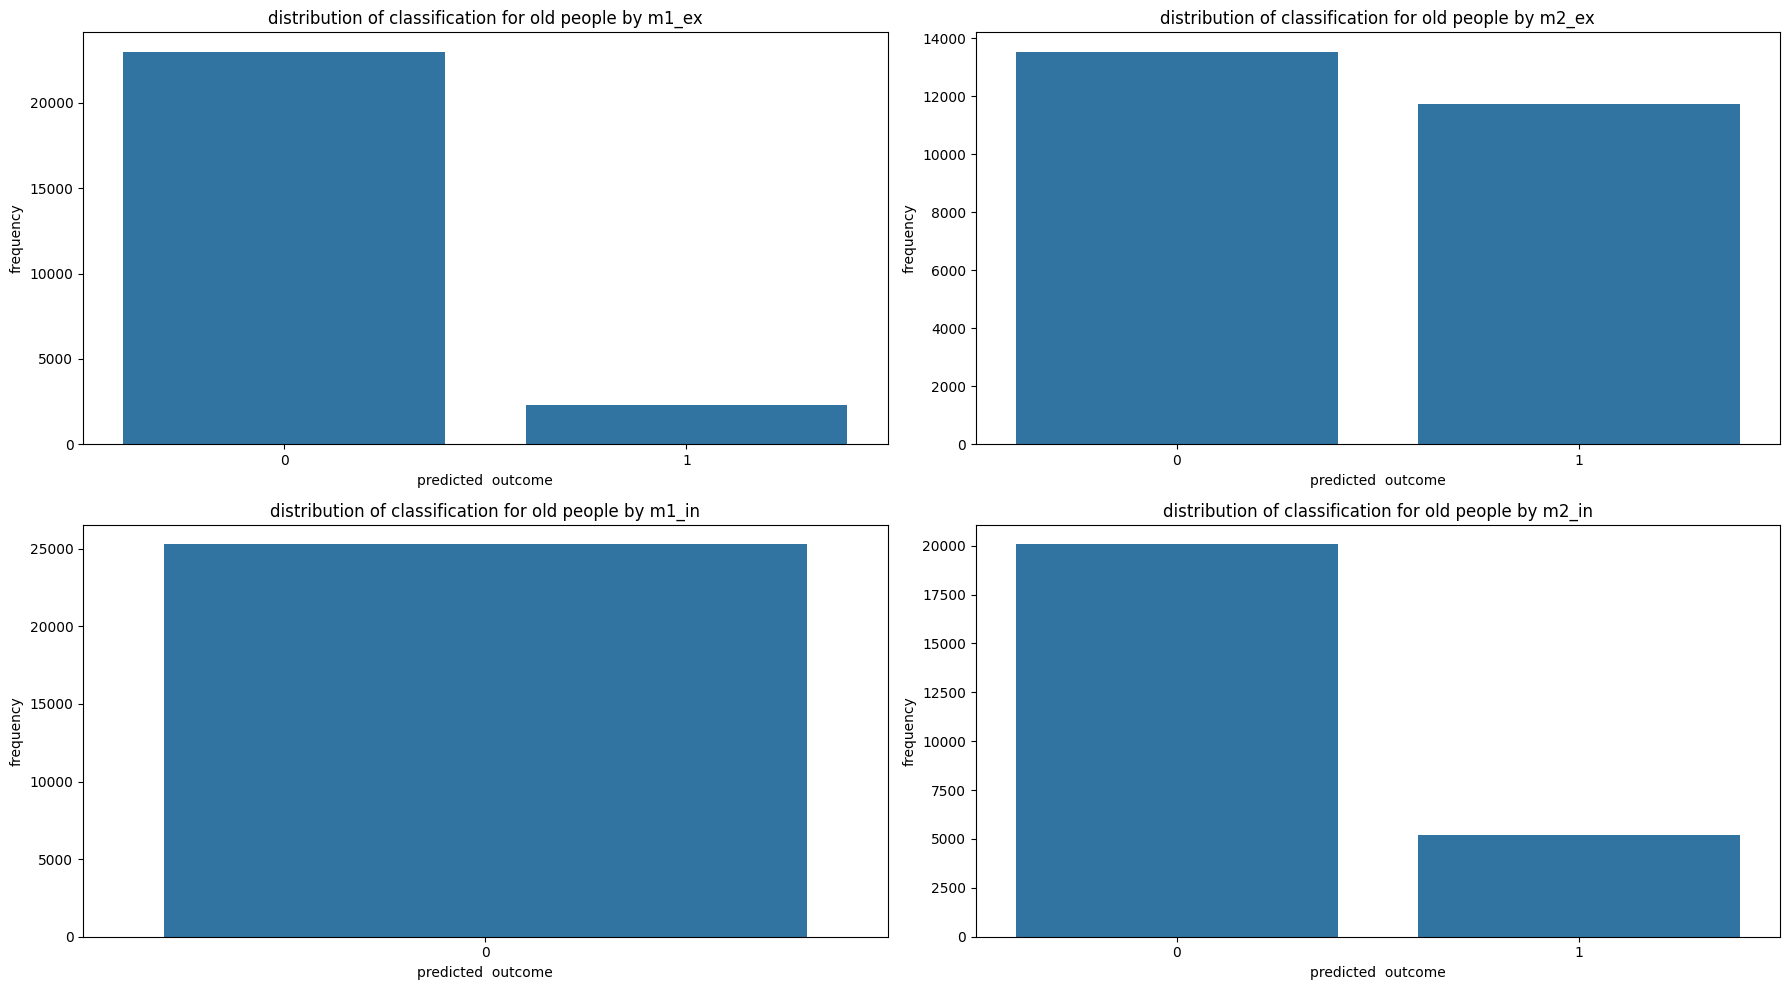

In [ ]:
plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=old_df[model_name])
  print(f'{model_name} predicted {old_df[model_name].value_counts()}')
  plt.title(f'distribution of classification for old people by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# Old vs Young 2

In [ ]:
og_data = pd.read_csv('/content/drive/MyDrive/tnv-final-project/og_synth_data_for_training.csv')
test_data = pd.read_csv('/content/drive/MyDrive/tnv-final-project/test.csv')

model_1_external = rt.InferenceSession('/content/drive/MyDrive/TnV-2nd_proj/model/model_1_external.onnx')
model_2_external = rt.InferenceSession('/content/drive/MyDrive/TnV-2nd_proj/model/model_2_external.onnx')
model_gbc = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/gboost.onnx')
model_1_internal = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/model1.onnx')
model_2_internal = rt.InferenceSession('/content/drive/MyDrive/tnv-final-project/model2.onnx')

In [ ]:
grouped = og_data.groupby('checked')
baseline = grouped.apply(lambda x: x.sample(n=300, random_state=1)).reset_index(drop=True)
baseline
positives = baseline[baseline['checked'] == 1]
negatives = baseline[baseline['checked'] == 0]
print(f"{len(positives)}, {len(negatives)}")

300, 300


In [ ]:
young_positives = positives.copy().reset_index(drop=True)
young_positives['persoon_leeftijd_bij_onderzoek'] = 20
young_positives = young_positives.drop('checked', axis=1)

young_negatives = negatives.copy().reset_index(drop=True)
young_negatives['persoon_leeftijd_bij_onderzoek'] = 20
young_negatives = young_negatives.drop('checked', axis=1)

In [ ]:
old_positives = positives.copy().reset_index(drop=True)
old_positives['persoon_leeftijd_bij_onderzoek'] = 60
old_positives = old_positives.drop('checked', axis=1)

old_negatives = negatives.copy().reset_index(drop=True)
old_negatives['persoon_leeftijd_bij_onderzoek'] = 60
old_negatives = old_negatives.drop('checked', axis=1)

In [ ]:
def convert_dataframe_schema(df, drop=None):
    inputs = []
    for k, v in zip(df.columns, df.dtypes):
        if drop is not None and k in drop:
            continue

        t = FloatTensorType([None, 1])

        inputs.append((k, t))
    return inputs


initial_inputs = convert_dataframe_schema(young_positives)
inputs_young_positives = {c: young_positives[c].values for c in young_positives.columns}
inputs_old_positives = {c: old_positives[c].values for c in old_positives.columns}

inputs_young_negatives = {c: young_negatives[c].values for c in young_negatives.columns}
inputs_old_negatives = {c: old_negatives[c].values for c in old_negatives.columns}

for (c, _) in initial_inputs:
    inputs_young_positives[c] = inputs_young_positives[c].astype(np.float32)
    inputs_old_positives[c] = inputs_old_positives[c].astype(np.float32)

    inputs_young_negatives[c] = inputs_young_negatives[c].astype(np.float32)
    inputs_old_negatives[c] = inputs_old_negatives[c].astype(np.float32)

for k in inputs_young_positives:
    inputs_young_positives[k] = inputs_young_positives[k].reshape((inputs_young_positives[k].shape[0], 1))
for k in inputs_old_positives:
    inputs_old_positives[k] = inputs_old_positives[k].reshape((inputs_old_positives[k].shape[0], 1))
for k in inputs_young_negatives:
    inputs_young_negatives[k] = inputs_young_negatives[k].reshape((inputs_young_negatives[k].shape[0], 1))
for k in inputs_old_negatives:
    inputs_old_negatives[k] = inputs_old_negatives[k].reshape((inputs_old_negatives[k].shape[0], 1))

In [ ]:
young_positives_preds_m1_external =  model_1_external.run(None, inputs_young_positives)
young_positives_preds_m2_external =  model_2_external.run(None, inputs_young_positives)
young_predicted_m1_external = [label for label in young_positives_preds_m1_external[0]]
young_predicted_m2_external = [label for label in young_positives_preds_m2_external[0]]

old_positives_preds_m1_external =  model_1_external.run(None, inputs_old_positives)
old_positives_preds_m2_external =  model_2_external.run(None, inputs_old_positives)
old_predicted_m1_external = [label for label in old_positives_preds_m1_external[0]]
old_predicted_m2_external = [label for label in old_positives_preds_m2_external[0]]

In [ ]:
young_positives['m1_ex'] = young_predicted_m1_external
young_positives['m2_ex'] = young_predicted_m2_external

old_positives['m1_ex'] = old_predicted_m1_external
old_positives['m2_ex'] = old_predicted_m2_external

In [ ]:
young_negatives_preds_m1_external =  model_1_external.run(None, inputs_young_negatives)
young_negatives_preds_m2_external =  model_2_external.run(None, inputs_young_negatives)
young_predicted_m1_external = [label for label in young_negatives_preds_m1_external[0]]
young_predicted_m2_external = [label for label in young_negatives_preds_m2_external[0]]

old_negatives_preds_m1_external =  model_1_external.run(None, inputs_old_negatives)
old_negatives_preds_m2_external =  model_2_external.run(None, inputs_old_negatives)
old_predicted_m1_external = [label for label in old_negatives_preds_m1_external[0]]
old_predicted_m2_external = [label for label in old_negatives_preds_m2_external[0]]

In [ ]:
young_negatives['m1_ex'] = young_predicted_m1_external
young_negatives['m2_ex'] = young_predicted_m2_external

old_negatives['m1_ex'] = old_predicted_m1_external
old_negatives['m2_ex'] = old_predicted_m2_external

m1_ex predicted m1_ex
1    248
0     52
Name: count, dtype: int64
m2_ex predicted m2_ex
1    230
0     70
Name: count, dtype: int64


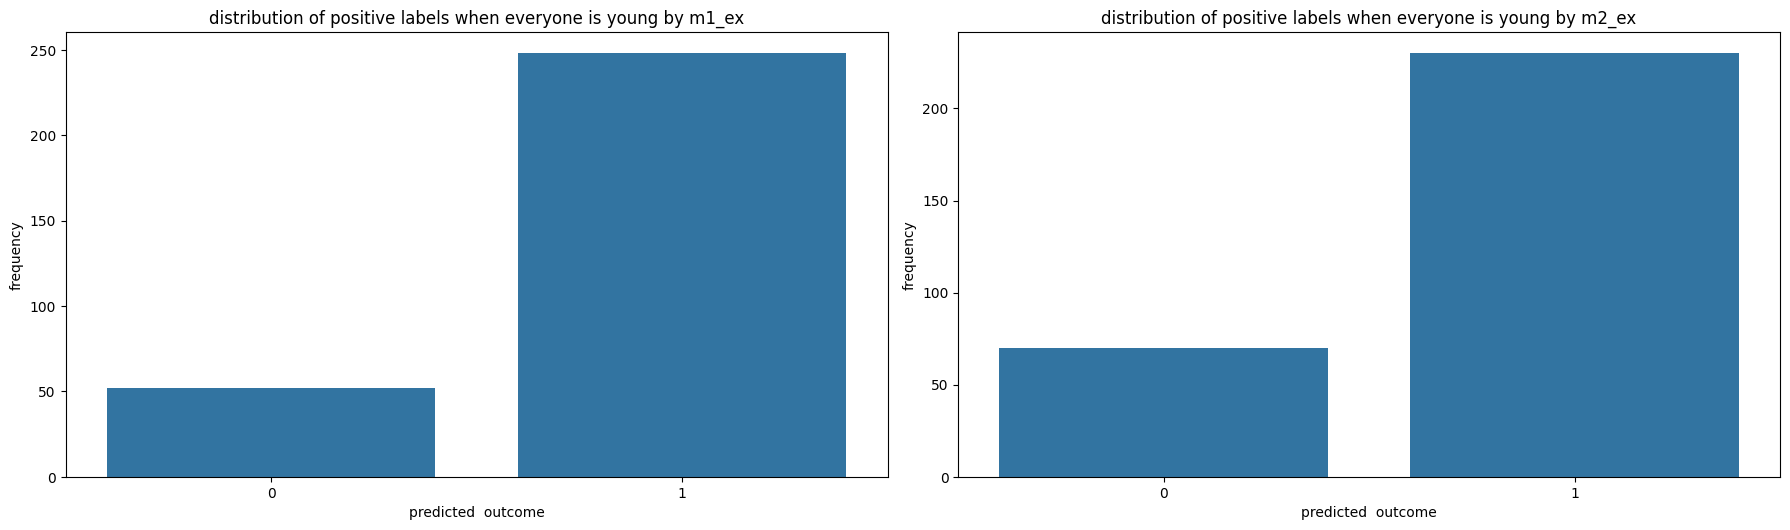

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=young_positives[model_name])
  print(f'{model_name} predicted {young_positives[model_name].value_counts()}')
  plt.title(f'distribution of positive labels when everyone is young by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    297
1      3
Name: count, dtype: int64
m2_ex predicted m2_ex
0    284
1     16
Name: count, dtype: int64


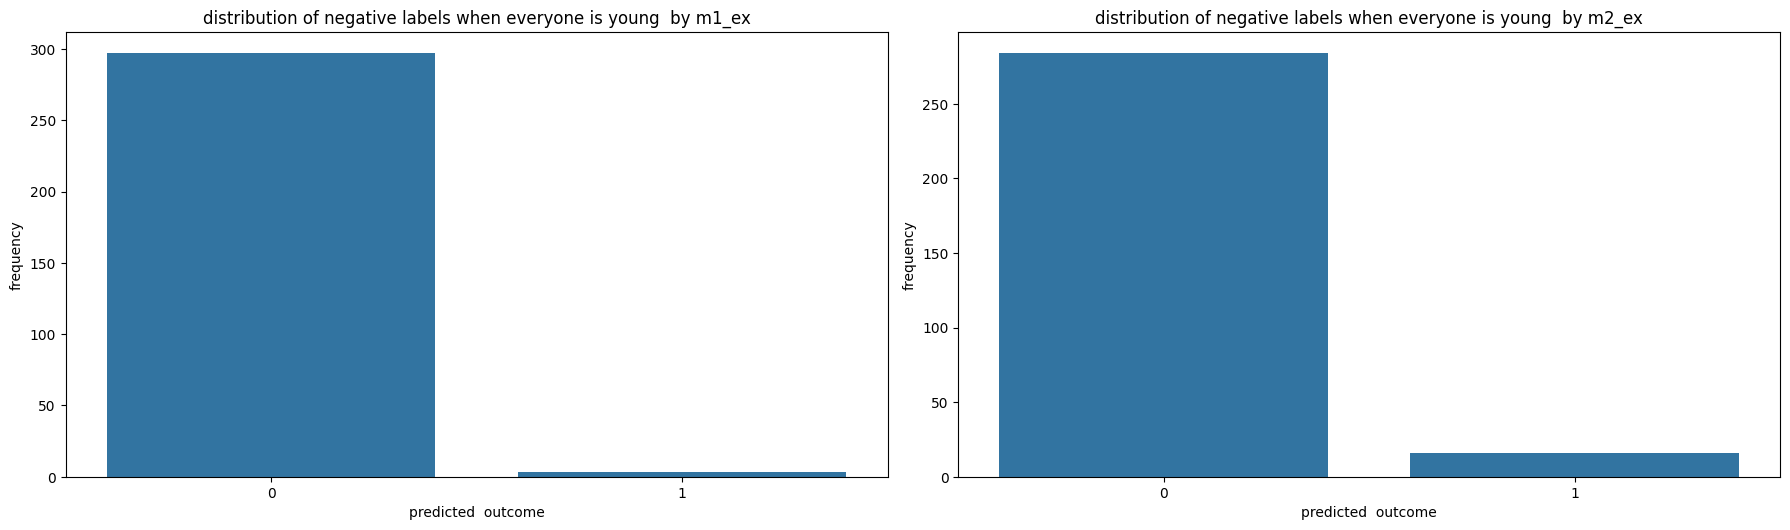

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=young_negatives[model_name])
  print(f'{model_name} predicted {young_negatives[model_name].value_counts()}')
  plt.title(f'distribution of negative labels when everyone is young  by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

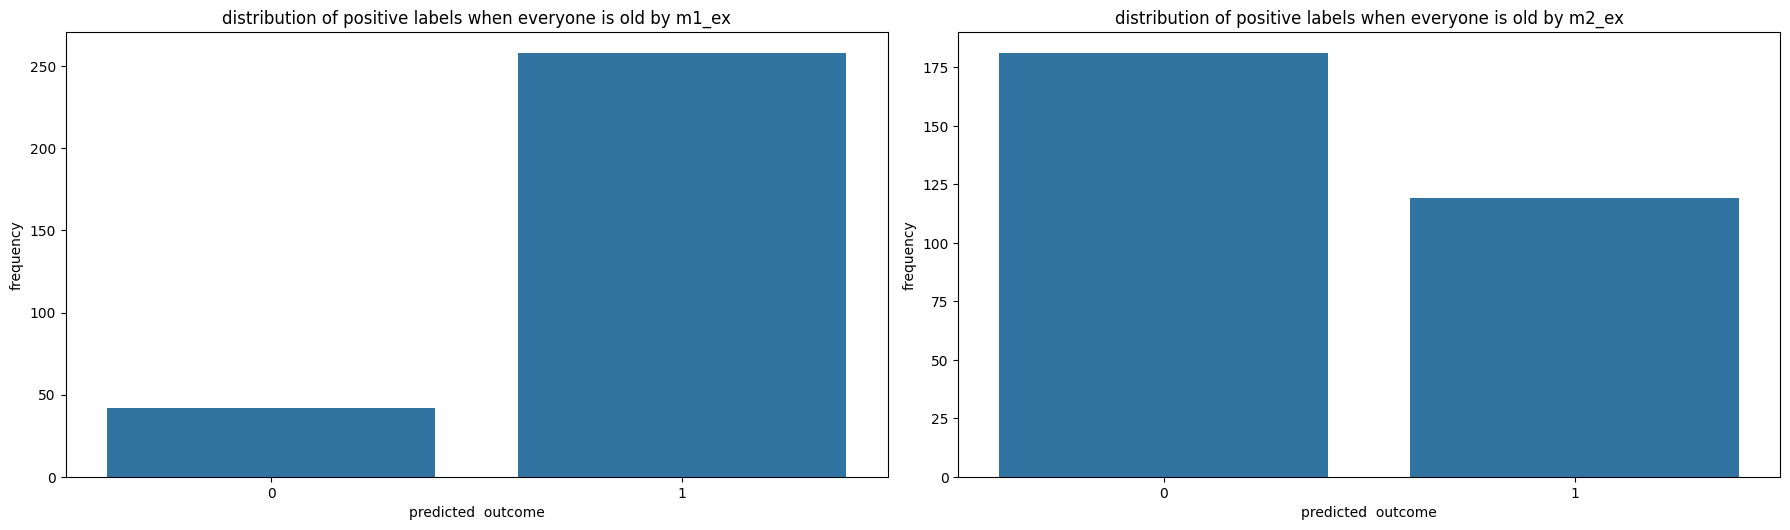

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=old_positives[model_name])
  plt.title(f'distribution of positive labels when everyone is old by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

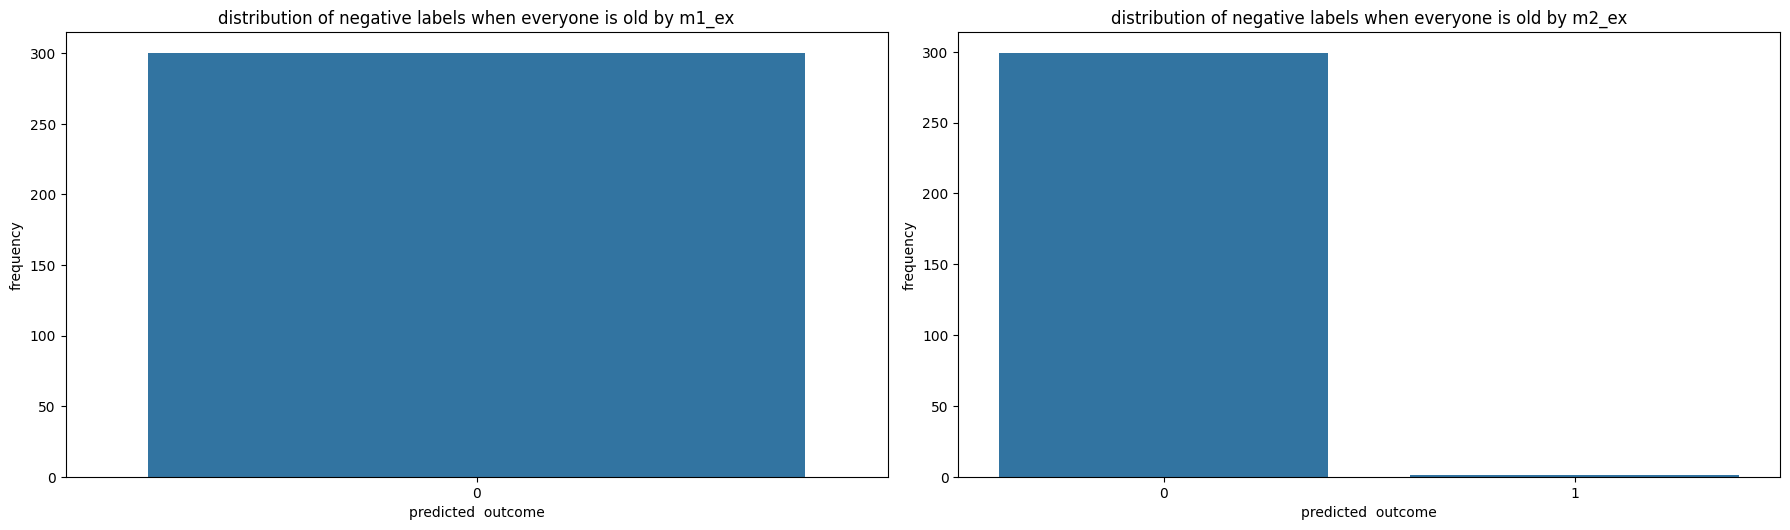

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=old_negatives[model_name])
  plt.title(f'distribution of negative labels when everyone is old by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# migrant arechtypes with different language skills

In [ ]:
arch_migrant_bad_dutch_path = '/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/migrant/20240416_kgar_arch_migrant_bad_dutch.csv'
arch_migrant_good_dutch_path = '/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/migrant/20240416_kgar_arch_migrant_good_dutch.csv'

In [ ]:
mig_good_dutch_df = pd.read_csv(arch_migrant_good_dutch_path)
mig_bad_dutch_df = pd.read_csv(arch_migrant_bad_dutch_path)

In [ ]:
mig_good_dutch_df = mig_good_dutch_df.drop('data_type', axis=1)
mig_good_dutch_df

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,3,1,0,0,10093,1,0,0,1,0,...,5513,1,0,1,0,0,0,0,0,0
1,3,3,1,2,1609,1,0,0,0,0,...,1767,3,0,1,0,1,0,0,0,0
2,5,2,1,1,281,1,0,0,1,0,...,8386,3,0,1,0,1,1,1,0,0
3,3,2,1,1,7667,1,0,0,1,0,...,4155,1,1,1,0,1,0,0,0,0
4,4,2,0,0,3926,1,0,0,0,0,...,6695,2,0,1,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1379,1,1,0,0,23138,1,0,0,1,0,...,254,1,0,1,0,1,0,0,0,0
1380,1,1,0,0,24262,1,0,0,0,0,...,6235,2,0,1,0,1,0,0,0,0
1381,3,2,0,0,2117,1,0,0,1,0,...,3461,1,0,1,0,0,0,0,0,0
1382,3,2,0,0,15917,1,0,0,0,0,...,3499,2,0,1,0,1,0,1,0,0


In [ ]:
mig_bad_dutch_df = mig_bad_dutch_df.drop('data_type', axis=1)
mig_bad_dutch_df

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,1,2,0,0,15406,1,0,0,1,0,...,2438,2,0,1,0,1,0,0,0,0
1,4,2,0,1,1820,1,0,0,1,0,...,-4769,1,0,1,0,0,0,0,0,0
2,2,2,0,0,7298,1,0,0,0,0,...,-2554,1,0,1,0,1,0,0,1,0
3,3,1,0,0,10093,1,0,0,1,0,...,5513,1,0,1,0,0,0,0,0,0
4,4,3,0,1,5578,1,0,0,0,0,...,3343,1,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1337,1,1,0,0,23138,1,0,0,1,0,...,254,1,0,1,0,1,0,0,0,0
1338,1,1,0,0,24262,1,0,0,0,0,...,6235,2,0,1,0,1,0,0,0,0
1339,3,2,0,0,2117,1,0,0,1,0,...,3461,1,0,1,0,0,0,0,0,0
1340,3,2,0,0,15917,1,0,0,0,0,...,3499,2,0,1,0,1,0,1,0,0


In [ ]:
initial_inputs = convert_dataframe_schema(mig_bad_dutch_df)
inputs_mig_good_dutch = {c: mig_good_dutch_df[c].values for c in mig_good_dutch_df.columns}
inputs_mig_bad_dutch = {c: mig_bad_dutch_df[c].values for c in mig_bad_dutch_df.columns}

for (c, _) in initial_inputs:
    inputs_mig_good_dutch[c] = inputs_mig_good_dutch[c].astype(np.float32)
    inputs_mig_bad_dutch[c] = inputs_mig_bad_dutch[c].astype(np.float32)
for k in inputs_mig_good_dutch:
    inputs_mig_good_dutch[k] = inputs_mig_good_dutch[k].reshape((inputs_mig_good_dutch[k].shape[0], 1))
for k in inputs_mig_bad_dutch:
    inputs_mig_bad_dutch[k] = inputs_mig_bad_dutch[k].reshape((inputs_mig_bad_dutch[k].shape[0], 1))

In [ ]:
mig_good_dutch_preds_m1_external =  model_1_external.run(None, inputs_mig_good_dutch)
mig_good_dutch_preds_m2_external =  model_2_external.run(None, inputs_mig_good_dutch)
mig_good_dutch_predicted_m1_external = [label for label in mig_good_dutch_preds_m1_external[0]]
mig_good_dutch_predicted_m2_external = [label for label in mig_good_dutch_preds_m2_external[0]]

mig_bad_dutch_preds_m1_external =  model_1_external.run(None, inputs_mig_bad_dutch)
mig_bad_dutch_preds_m2_external =  model_2_external.run(None, inputs_mig_bad_dutch)
mig_bad_dutch_predicted_m1_external = [label for label in mig_bad_dutch_preds_m1_external[0]]
mig_bad_dutch_predicted_m2_external = [label for label in mig_bad_dutch_preds_m2_external[0]]

In [ ]:
mig_good_dutch_df['m1_ex'] = mig_good_dutch_predicted_m1_external
mig_good_dutch_df['m2_ex'] = mig_good_dutch_predicted_m2_external

mig_bad_dutch_df['m1_ex'] = mig_bad_dutch_predicted_m1_external
mig_bad_dutch_df['m2_ex'] = mig_bad_dutch_predicted_m2_external

m1_ex predicted m1_ex
0    1256
1     128
Name: count, dtype: int64
m2_ex predicted m2_ex
0    1226
1     158
Name: count, dtype: int64


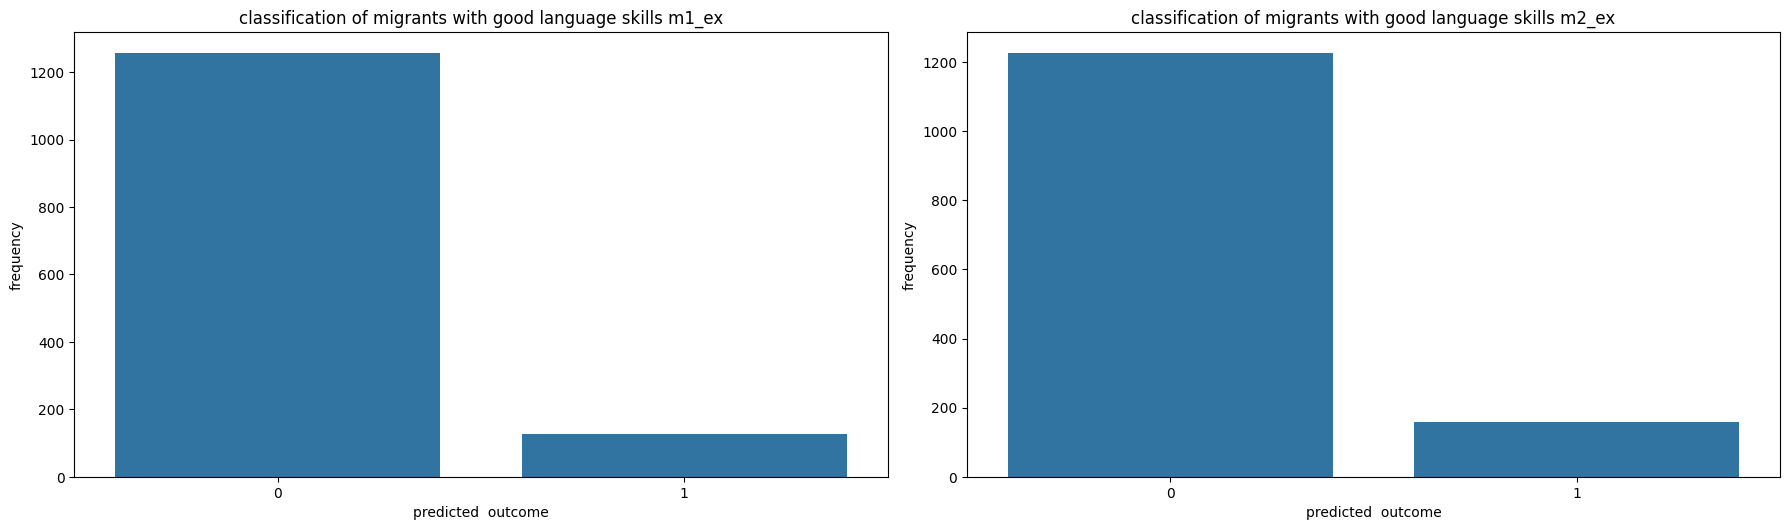

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=mig_good_dutch_df[model_name])
  print(f'{model_name} predicted {mig_good_dutch_df[model_name].value_counts()}')
  plt.title(f'classification of migrants with good language skills {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    1278
1      64
Name: count, dtype: int64
m2_ex predicted m2_ex
0    1276
1      66
Name: count, dtype: int64


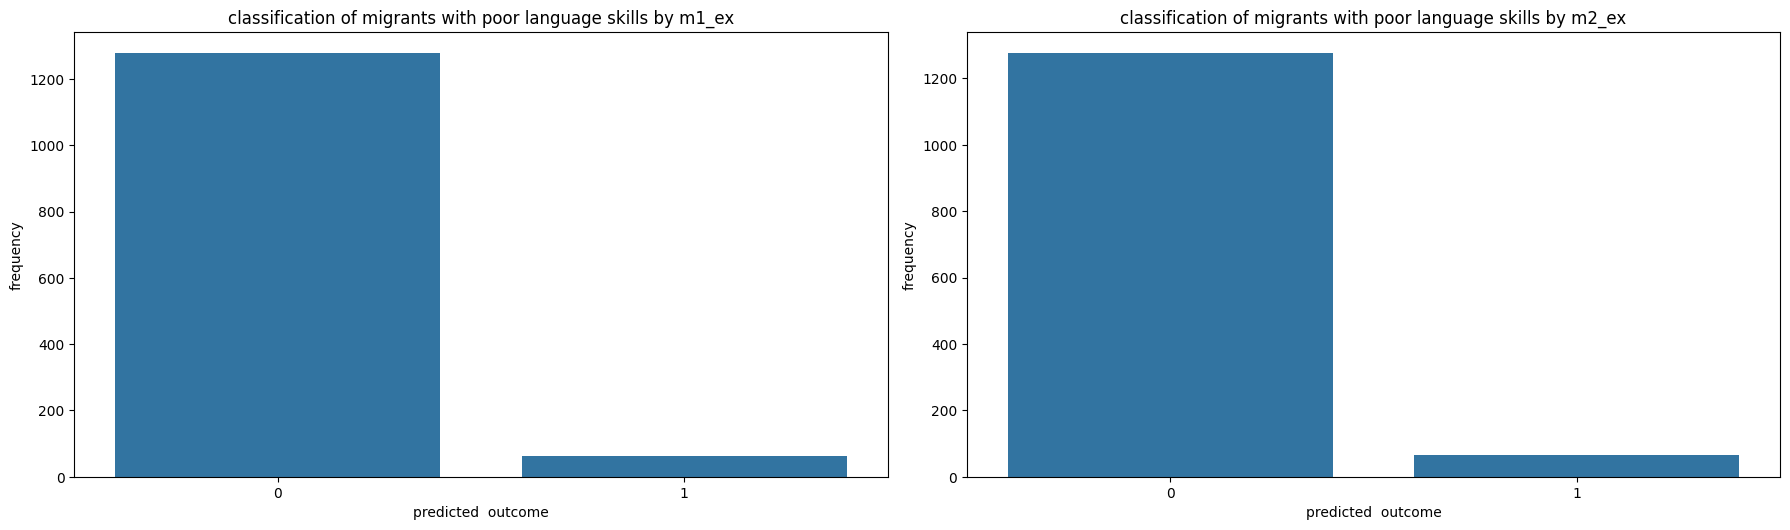

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=mig_bad_dutch_df[model_name])
  print(f'{model_name} predicted {mig_bad_dutch_df[model_name].value_counts()}')
  plt.title(f'classification of migrants with poor language skills by {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# Speaks a different language and lives in centrum

In [ ]:
v_dutch = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/age/20240416_kgar_very_dutch_5.csv')
not_v_dutch = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/age/20240416_kgar_non_dutch_5.csv')

In [ ]:
v_dutch = v_dutch.drop('data_type', axis=1)
not_v_dutch = not_v_dutch.drop('data_type', axis=1)

In [ ]:
# v_dutch = v_dutch.sample(n=500, random_state=1)
# not_v_dutch = not_v_dutch.sample(n=500, random_state=1)

In [ ]:
v_dutch

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,1,1,0,0,24118,1,0,0,0,0,...,3950,1,0,1,0,1,0,0,0,0
1,1,1,0,0,24326,1,0,0,1,0,...,-1258,1,0,1,0,0,0,0,0,0
2,6,3,1,1,3575,1,0,0,1,0,...,-390,1,0,1,0,0,0,1,0,0
3,2,1,0,0,19776,1,0,0,0,0,...,5275,1,0,1,0,1,0,1,0,0
4,6,2,0,1,3152,1,0,0,0,0,...,-1664,2,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3629,3,2,0,0,2117,1,0,0,1,0,...,3461,1,0,1,0,0,0,0,0,0
3630,3,2,1,1,5256,1,0,0,0,0,...,2112,2,0,1,0,1,0,1,0,0
3631,3,2,0,0,15917,1,0,0,0,0,...,3499,2,0,1,0,1,0,1,0,0
3632,1,2,1,0,18489,1,0,0,1,0,...,467,1,0,1,0,0,0,0,0,0


In [ ]:
not_v_dutch

,adres_aantal_brp_adres,adres_aantal_verschillende_wijken,adres_aantal_verzendadres,adres_aantal_woonadres_handmatig,adres_dagen_op_adres,adres_recentst_onderdeel_rdam,adres_recentste_buurt_groot_ijsselmonde,adres_recentste_buurt_nieuwe_westen,adres_recentste_buurt_other,adres_recentste_buurt_oude_noorden,...,typering_dagen_som,typering_hist_aantal,typering_hist_inburgeringsbehoeftig,typering_hist_ind,typering_hist_sector_zorg,typering_ind,typering_indicatie_geheime_gegevens,typering_other,typering_transport__logistiek___tuinbouw,typering_zorg__schoonmaak___welzijn
0,3,1,0,0,10093,1,0,0,1,0,...,5513,1,0,1,0,0,0,0,0,0
1,2,3,0,0,4307,1,0,0,0,0,...,2923,3,0,1,0,1,0,1,0,0
2,5,4,2,0,1582,0,0,0,1,0,...,-2028,1,0,1,0,0,0,0,0,0
3,4,2,1,1,3153,1,0,0,1,0,...,5066,1,0,1,0,1,0,1,0,0
4,3,2,1,0,14464,1,0,0,0,0,...,9357,2,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12606,3,3,1,1,7257,1,0,0,1,0,...,194,2,0,1,0,1,0,0,0,0
12607,5,4,1,1,5618,1,0,0,1,0,...,-4052,1,0,1,0,1,0,0,0,0
12608,4,2,0,1,8409,1,0,0,0,0,...,-1858,2,0,1,0,1,0,0,0,0
12609,2,1,0,0,12242,1,0,0,0,0,...,-2023,1,0,1,1,0,0,0,0,0


In [ ]:
initial_inputs = convert_dataframe_schema(v_dutch)
inputs_v_dutch = {c: v_dutch[c].values for c in v_dutch.columns}
inputs_not_v_dutch = {c: not_v_dutch[c].values for c in not_v_dutch.columns}

for (c, _) in initial_inputs:
    inputs_v_dutch[c] = inputs_v_dutch[c].astype(np.float32)
    inputs_not_v_dutch[c] = inputs_not_v_dutch[c].astype(np.float32)
for k in inputs_v_dutch:
    inputs_v_dutch[k] = inputs_v_dutch[k].reshape((inputs_v_dutch[k].shape[0], 1))
for k in inputs_not_v_dutch:
    inputs_not_v_dutch[k] = inputs_not_v_dutch[k].reshape((inputs_not_v_dutch[k].shape[0], 1))

In [ ]:
v_dutch_preds_m1_external =  model_1_external.run(None, inputs_v_dutch)
v_dutch_preds_m2_external =  model_2_external.run(None, inputs_v_dutch)
v_dutch_predicted_m1_external = [label for label in v_dutch_preds_m1_external[0]]
v_dutch_predicted_m2_external = [label for label in v_dutch_preds_m2_external[0]]

not_v_dutch_preds_m1_external =  model_1_external.run(None, inputs_not_v_dutch)
not_v_dutch_preds_m2_external =  model_2_external.run(None, inputs_not_v_dutch)
not_v_dutch_predicted_m1_external = [label for label in not_v_dutch_preds_m1_external[0]]
not_v_dutch_predicted_m2_external = [label for label in not_v_dutch_preds_m2_external[0]]

In [ ]:
v_dutch_preds_m1_internal =  model_1_internal.run(None, {'X': v_dutch.values.astype(np.float32)})
v_dutch_preds_m2_internal =  model_2_internal.run(None, {'X': v_dutch.values.astype(np.float32)})
v_dutch_predicted_m1_internal = [label for label in v_dutch_preds_m1_internal[0]]
v_dutch_predicted_m2_internal = [label for label in v_dutch_preds_m2_internal[0]]

not_v_dutch_preds_m1_internal =  model_1_internal.run(None, {'X': not_v_dutch.values.astype(np.float32)})
not_v_dutch_preds_m2_internal =  model_2_internal.run(None, {'X': not_v_dutch.values.astype(np.float32)})
not_v_dutch_predicted_m1_internal = [label for label in not_v_dutch_preds_m1_internal[0]]
not_v_dutch_predicted_m2_internal = [label for label in not_v_dutch_preds_m2_internal[0]]

In [ ]:
v_dutch['m1_ex'] = v_dutch_predicted_m1_external
v_dutch['m2_ex'] = v_dutch_predicted_m2_external

not_v_dutch['m1_ex'] = not_v_dutch_predicted_m1_external
not_v_dutch['m2_ex'] = not_v_dutch_predicted_m2_external

v_dutch['m1_in'] = v_dutch_predicted_m1_internal
v_dutch['m2_in'] = v_dutch_predicted_m2_internal
not_v_dutch['m1_in'] = not_v_dutch_predicted_m1_internal
not_v_dutch['m2_in'] = not_v_dutch_predicted_m2_internal

m1_in predicted m1_in
0    3631
1       3
Name: count, dtype: int64
m2_in predicted m2_in
0    3360
1     274
Name: count, dtype: int64


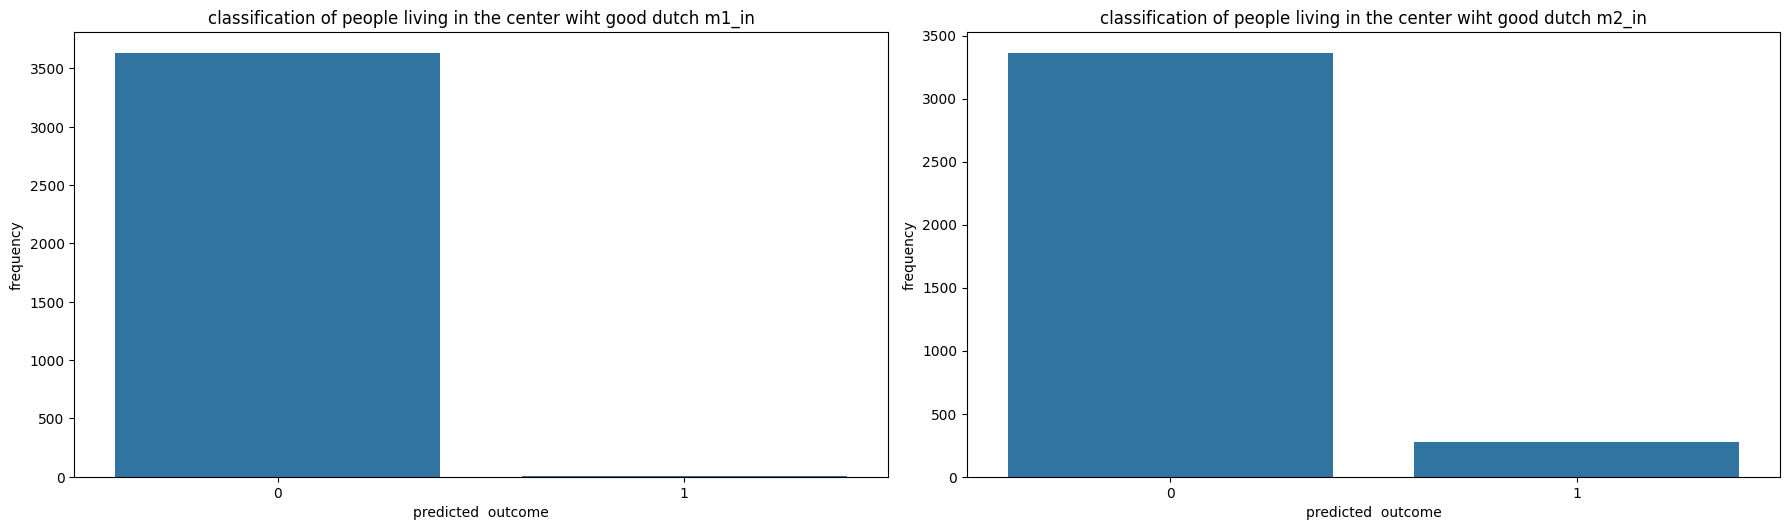

In [ ]:
model_names = ['m1_in', 'm2_in']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=v_dutch[model_name])
  print(f'{model_name} predicted {v_dutch[model_name].value_counts()}')
  plt.title(f'classification of people living in the center with good dutch {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    3367
1     267
Name: count, dtype: int64
m2_ex predicted m2_ex
0    3471
1     163
Name: count, dtype: int64


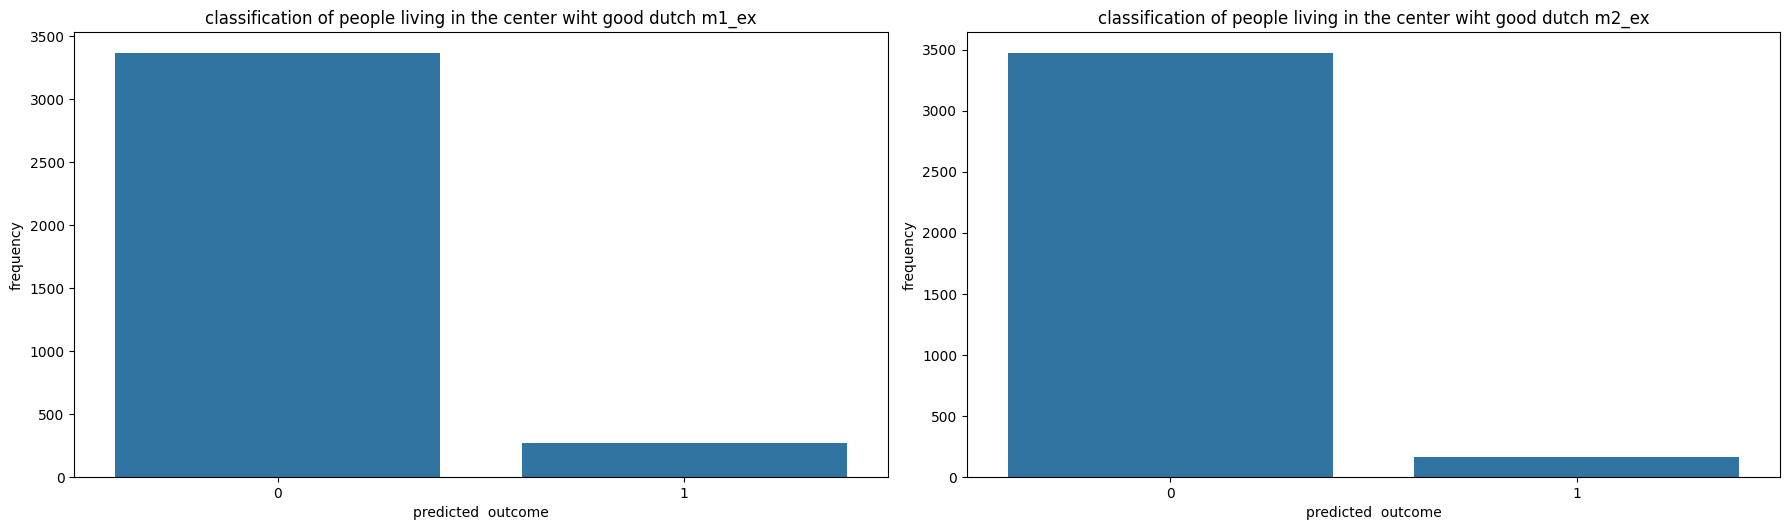

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=v_dutch[model_name])
  print(f'{model_name} predicted {v_dutch[model_name].value_counts()}')
  plt.title(f'classification of people living in the center with good dutch {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_in predicted m1_in
0    12600
1       11
Name: count, dtype: int64
m2_in predicted m2_in
0    11522
1     1089
Name: count, dtype: int64


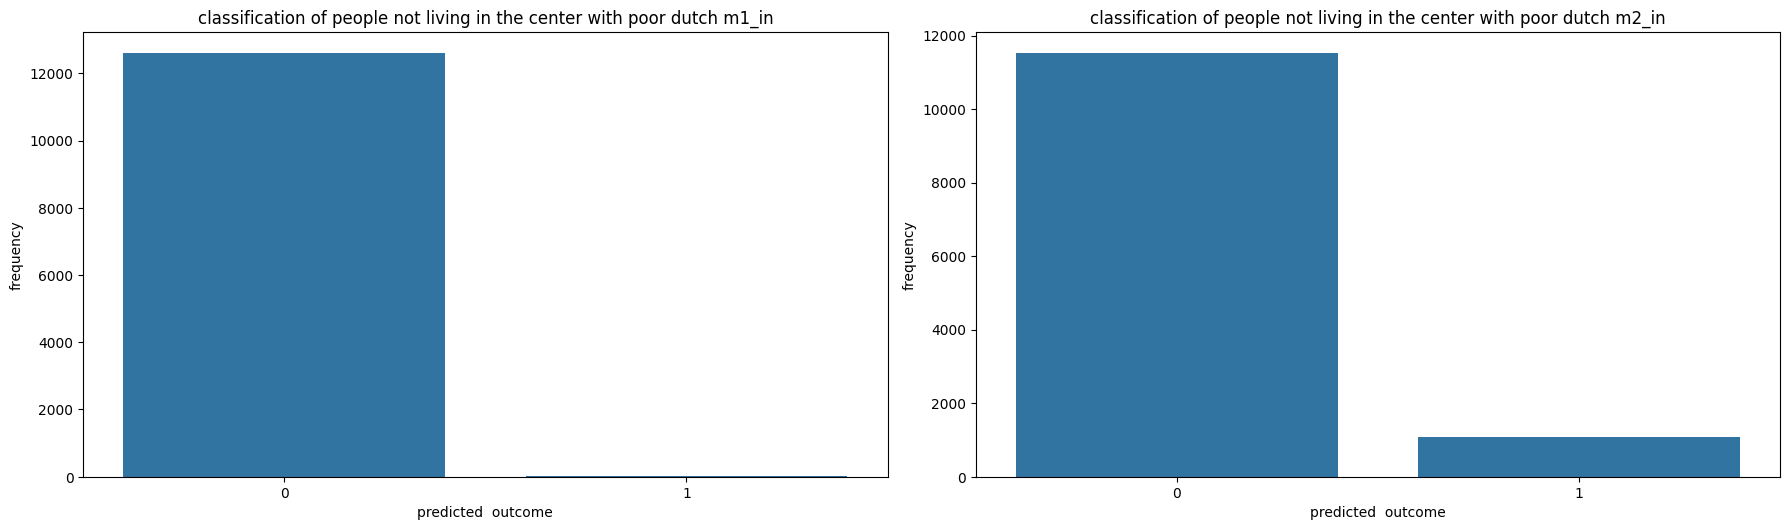

In [ ]:
model_names = ['m1_in', 'm2_in']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=not_v_dutch[model_name])
  print(f'{model_name} predicted {not_v_dutch[model_name].value_counts()}')
  plt.title(f'classification of people not living in the center with poor dutch {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    11410
1     1201
Name: count, dtype: int64
m2_ex predicted m2_ex
0    11215
1     1396
Name: count, dtype: int64


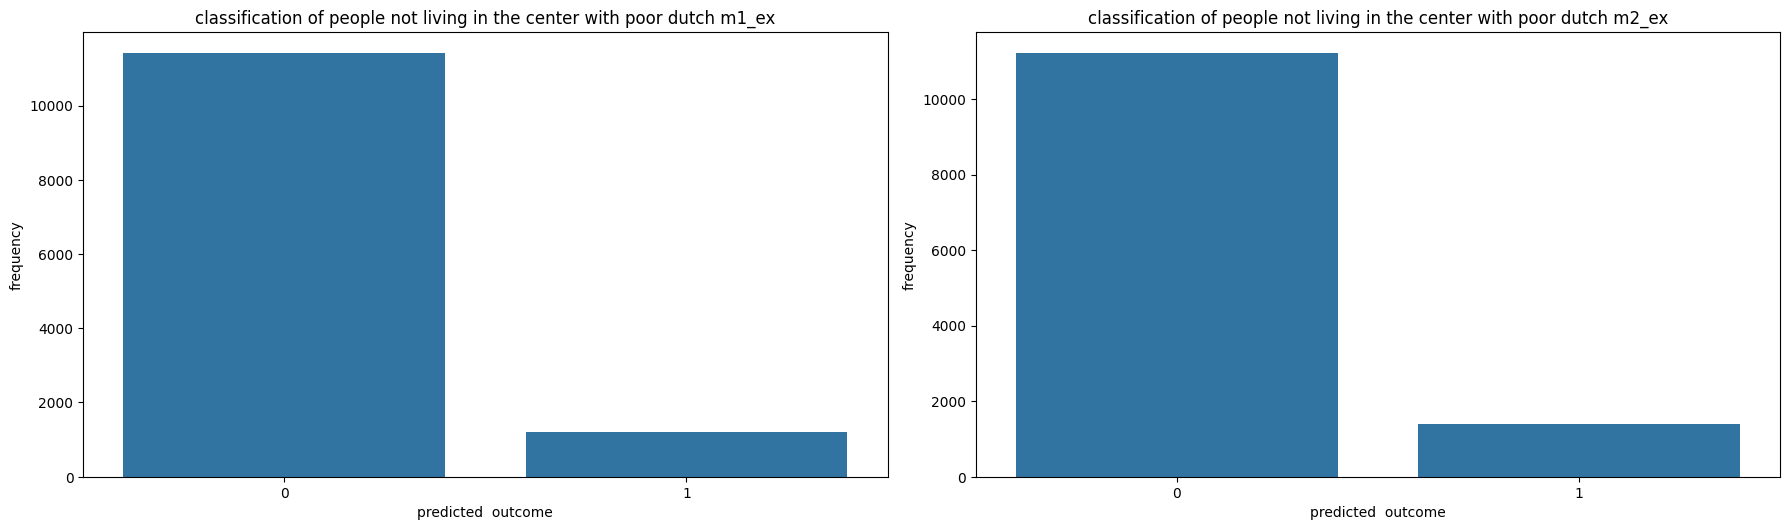

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=not_v_dutch[model_name])
  print(f'{model_name} predicted {not_v_dutch[model_name].value_counts()}')
  plt.title(f'classification of people not living in the center with poor dutch {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('frequency')

plt.tight_layout()
plt.show()

# Old vs Young

In [ ]:
old = pd.read_csv('/content/drive/MyDrive/TnV-2nd_proj/sm_data/output/age/20240416_kgar_archold.csv')

In [ ]:
old = old.drop('data_type', axis=1)
old['persoon_leeftijd_bij_onderzoek']

0        65
1        65
2        65
3        65
4        65
         ..
25269    75
25270    75
25271    75
25272    75
25273    75
Name: persoon_leeftijd_bij_onderzoek, Length: 25274, dtype: int64

In [ ]:
young = old.copy(deep=True)
young['persoon_leeftijd_bij_onderzoek'] = young['persoon_leeftijd_bij_onderzoek'].apply(lambda x: 20 if x == 65 else 25)

In [ ]:
initial_inputs = convert_dataframe_schema(young)
inputs_old = {c: old[c].values for c in old.columns}
inputs_young = {c: young[c].values for c in young.columns}

for (c, _) in initial_inputs:
    inputs_old[c] = inputs_old[c].astype(np.float32)
    inputs_young[c] = inputs_young[c].astype(np.float32)
for k in inputs_old:
    inputs_old[k] = inputs_old[k].reshape((inputs_old[k].shape[0], 1))
for k in inputs_young:
    inputs_young[k] = inputs_young[k].reshape((inputs_young[k].shape[0], 1))

In [ ]:
old_preds_m1_external =  model_1_external.run(None, inputs_old)
old_preds_m2_external =  model_2_external.run(None, inputs_old)
old_predicted_m1_external = [label for label in old_preds_m1_external[0]]
old_predicted_m2_external = [label for label in old_preds_m2_external[0]]

young_preds_m1_external =  model_1_external.run(None, inputs_young)
young_preds_m2_external =  model_2_external.run(None, inputs_young)
young_predicted_m1_external = [label for label in young_preds_m1_external[0]]
young_predicted_m2_external = [label for label in young_preds_m2_external[0]]

In [ ]:
old_preds_m1_internal =  model_1_internal.run(None, {'X': old.values.astype(np.float32)})
old_preds_m2_internal =  model_2_internal.run(None, {'X': old.values.astype(np.float32)})

young_preds_m1_internal =  model_1_internal.run(None, {'X': young.values.astype(np.float32)})
young_preds_m2_internal =  model_2_internal.run(None, {'X': young.values.astype(np.float32)})

old_predicted_m1_internal = [label for label in old_preds_m1_internal[0]]
old_predicted_m2_internal = [label for label in old_preds_m2_internal[0]]
young_predicted_m1_internal = [label for label in young_preds_m1_internal[0]]
young_predicted_m2_internal = [label for label in young_preds_m2_internal[0]]

In [ ]:
old['m1_ex'] = old_predicted_m1_external
old['m2_ex'] = old_predicted_m2_external
young['m1_ex'] = young_predicted_m1_external
young['m2_ex'] = young_predicted_m2_external

old['m1_in'] = old_predicted_m1_internal
old['m2_in'] = old_predicted_m2_internal
young['m1_in'] = young_predicted_m1_internal
young['m2_in'] = young_predicted_m2_internal

m1_in predicted m1_in
0    25274
Name: count, dtype: int64
m2_in predicted m2_in
0    20062
1     5212
Name: count, dtype: int64


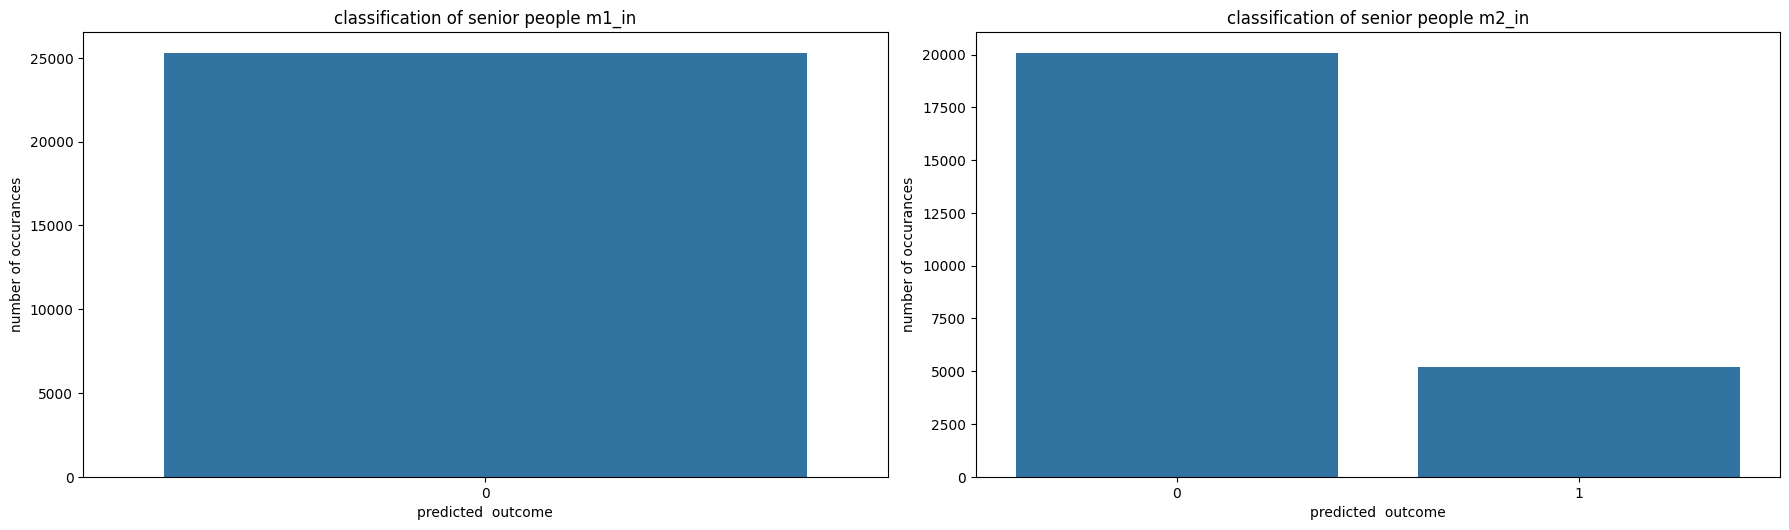

In [ ]:
model_names = ['m1_in', 'm2_in']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=old[model_name])
  print(f'{model_name} predicted {old[model_name].value_counts()}')
  plt.title(f'classification of senior people {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('number of occurances')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    22984
1     2290
Name: count, dtype: int64
m2_ex predicted m2_ex
0    13530
1    11744
Name: count, dtype: int64


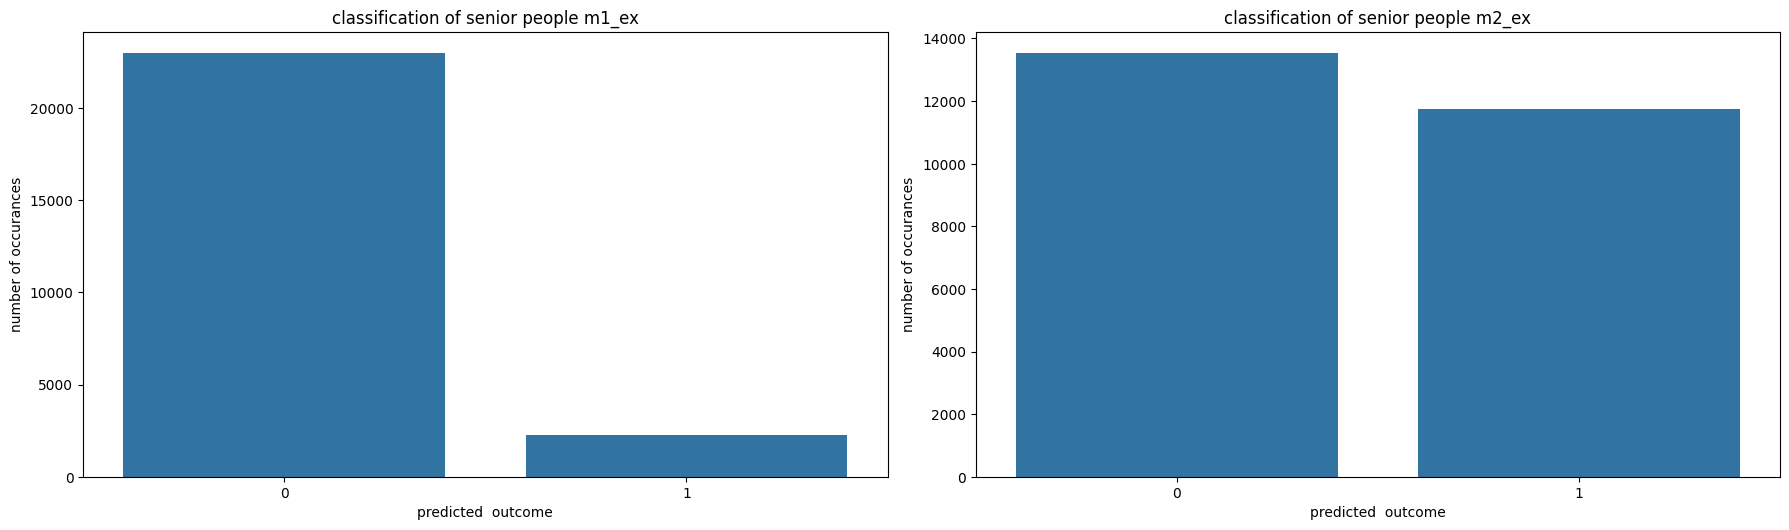

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=old[model_name])
  print(f'{model_name} predicted {old[model_name].value_counts()}')
  plt.title(f'classification of senior people {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('number of occurances')

plt.tight_layout()
plt.show()

m1_in predicted m1_in
0    24993
1      281
Name: count, dtype: int64
m2_in predicted m2_in
0    23087
1     2187
Name: count, dtype: int64


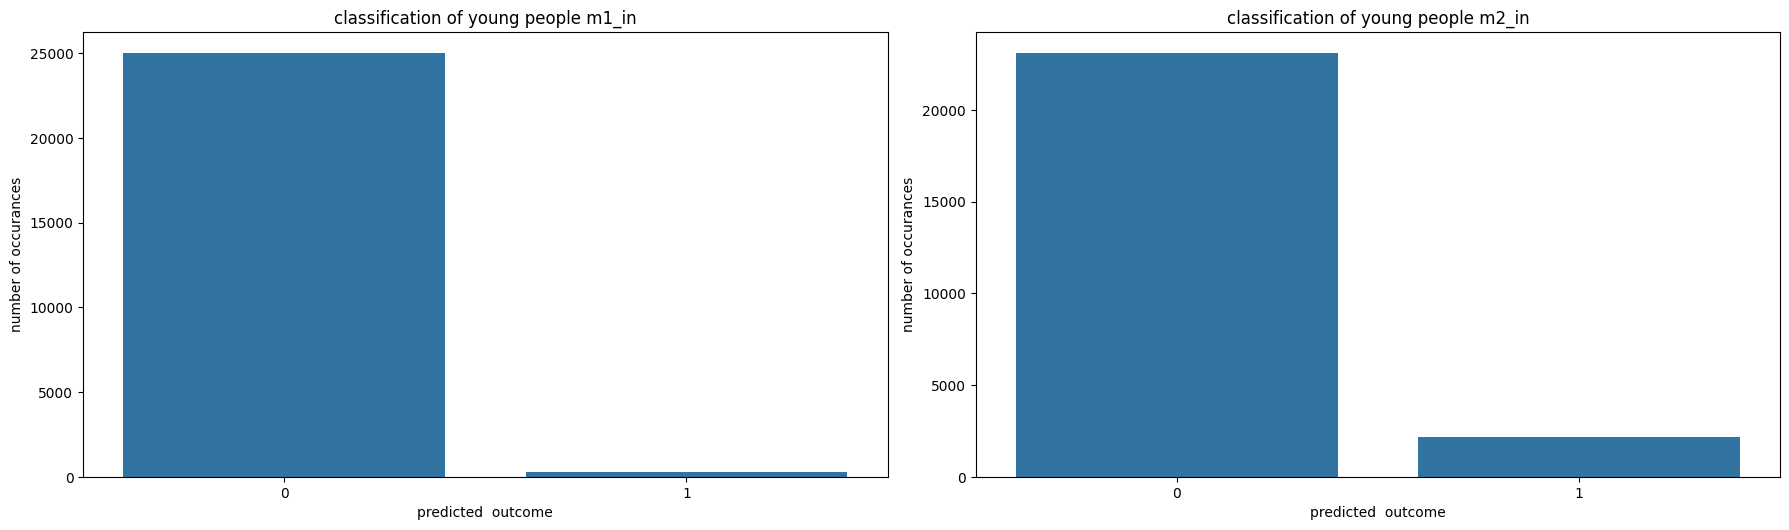

In [ ]:
model_names = ['m1_in', 'm2_in']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=young[model_name])
  print(f'{model_name} predicted {young[model_name].value_counts()}')
  plt.title(f'classification of young people {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('number of occurances')

plt.tight_layout()
plt.show()

m1_ex predicted m1_ex
0    22892
1     2382
Name: count, dtype: int64
m2_ex predicted m2_ex
0    21904
1     3370
Name: count, dtype: int64


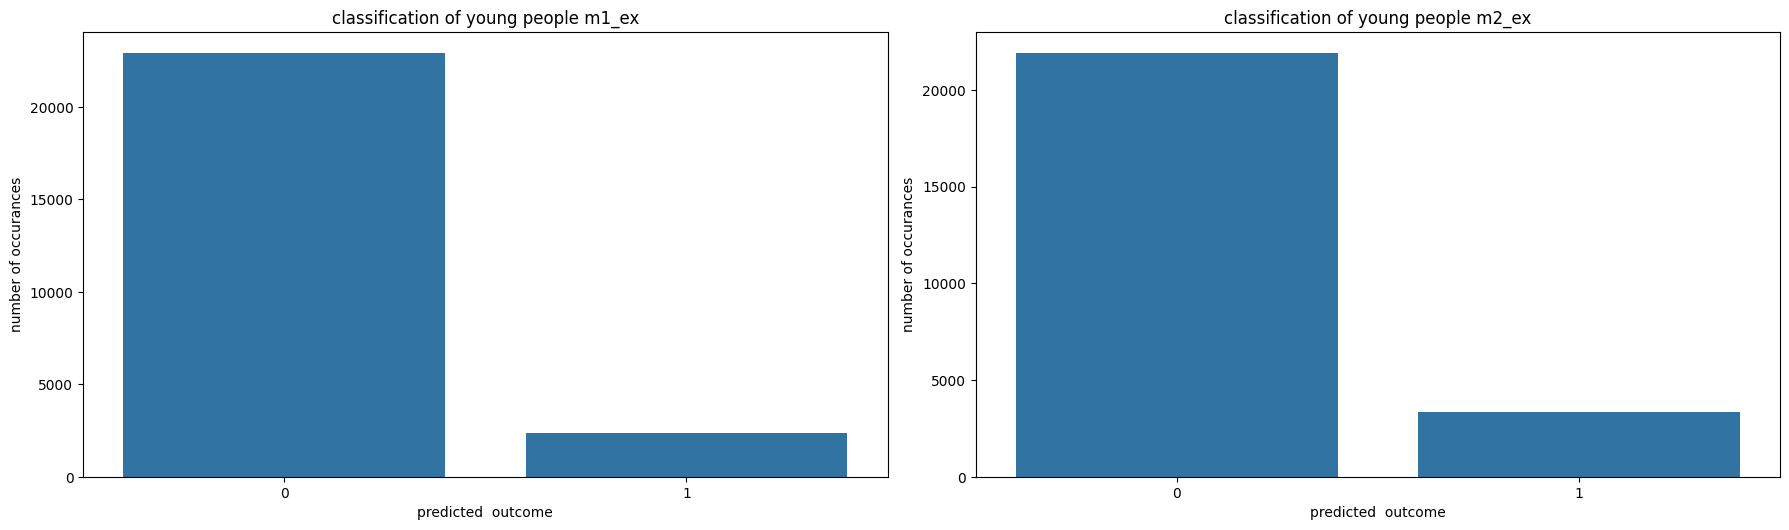

In [ ]:
model_names = ['m1_ex', 'm2_ex']

plt.figure(figsize=(18, 10))

for i, model_name in enumerate(model_names, 1):
  plt.subplot(2, 2, i)
  sns.countplot(x=young[model_name])
  print(f'{model_name} predicted {young[model_name].value_counts()}')
  plt.title(f'classification of young people {model_name}')
  plt.xlabel('predicted  outcome')
  plt.ylabel('number of occurances')

plt.tight_layout()
plt.show()